In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'].insert(0, 'anumGothic') 
%matplotlib inline

# folium 을 활용한 지도 시각화

In [14]:
import folium

In [15]:
map1 = folium.Map(location = [37.5665, 126.9779], zoom_start=15)

In [16]:
folium.Marker([37.5665, 126.9779],\
              popup='click massage').add_to(map1)

In [17]:
map1

# 서울시 유동인구 분석

In [18]:
df = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx',\
              skiprows=[0,1,3])[['조사지점명','X좌표','Y좌표']].dropna()

In [19]:
df

,조사지점명,X좌표,Y좌표
0,신흥모피명품전문크리닝.,196423.97707,455511.52968
1,GS25,196315.80243,455621.38262
2,세검정정류장,196357.17125,455680.82580
3,안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
4,복실 손뜨기.,196360.44943,456405.89296
...,...,...,...
1422,신동아생활용품DC마트,211375.75228,450168.33297
1423,신동아생활용품DC마트,211375.75228,450168.33297
1424,햇빛도서관,211026.96705,450051.61417
1425,길동 GS 25 편의점,212146.74179,448482.40125


In [20]:
#위치 정보 변환 라이브러리
from pyproj import Transformer

In [21]:
transformer = Transformer.from_crs("epsg:5181", "epsg:4326")

In [22]:
transformer.transform(196423.97707, 455511.52968)

(35.231807288603704, 129.80651596957898)

In [23]:
df.set_index('조사지점명',inplace=True)
df

,X좌표,Y좌표
조사지점명,,
신흥모피명품전문크리닝.,196423.97707,455511.52968
GS25,196315.80243,455621.38262
세검정정류장,196357.17125,455680.82580
안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
복실 손뜨기.,196360.44943,456405.89296
...,...,...
신동아생활용품DC마트,211375.75228,450168.33297
신동아생활용품DC마트,211375.75228,450168.33297
햇빛도서관,211026.96705,450051.61417


In [24]:
df['위경도'] = df.apply(lambda x: transformer.transform(x[0], x[1]),axis=1)

In [25]:
df

,X좌표,Y좌표,위경도
조사지점명,,,
신흥모피명품전문크리닝.,196423.97707,455511.52968,"(35.231807288603704, 129.80651596957898)"
GS25,196315.80243,455621.38262,"(35.23080545716457, 129.80768771473544)"
세검정정류장,196357.17125,455680.82580,"(35.23116274363587, 129.8083527715038)"
안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996,"(35.24482500040201, 129.82021893331495)"
복실 손뜨기.,196360.44943,456405.89296,"(35.23100727596359, 129.81630924553778)"
...,...,...,...
신동아생활용품DC마트,211375.75228,450168.33297,"(35.36776393484134, 129.75244549322412)"
신동아생활용품DC마트,211375.75228,450168.33297,"(35.36776393484134, 129.75244549322412)"
햇빛도서관,211026.96705,450051.61417,"(35.36465310166878, 129.75105600976408)"


In [26]:
for index, row in df.iterrows():
    folium.Marker(list(row['위경도']), popup=index).add_to(map1)

In [27]:
map1

## 데이터 적재

In [28]:
유동인구 = pd.read_excel('data/서울시유동인구/0_유동인구_유동인구기본_2015.xlsx',skiprows=[0,1,3])

In [29]:
data = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx',\
                skiprows=[0,1,3],sheet_name=None)

In [30]:
data.keys()

dict_keys(['유동인구_조사지점정보_2015', 'FTPTH_STLE_CN', 'GU_CD', 'DONG_CD', 'SM_GU_CD'])

In [31]:
조사지점 = data['유동인구_조사지점정보_2015']
구코드 = data['GU_CD']
동코드 = data['DONG_CD']

##  데이터 탐색 

### 유동인구 데이터 탐색

In [32]:
유동인구.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102956 entries, 0 to 102955
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID유동인구조사  102956 non-null  int64  
 1   조사지점코드    102956 non-null  object 
 2   조사구분      102956 non-null  object 
 3   조사요일      102956 non-null  object 
 4   시간대       102956 non-null  object 
 5   유동인구수     102956 non-null  float64
 6   년도        102956 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [33]:
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [34]:
유동인구.조사지점코드.unique().size

1300

In [35]:
for col in ['조사구분', '조사요일', '시간대']:
    print('-----------',col,'-----------')
    print(유동인구[col].value_counts())

----------- 조사구분 -----------
본조사       85890
계절요인조사    14000
지하철        2058
북촌         1008
Name: 조사구분, dtype: int64
----------- 조사요일 -----------
토    21000
금    20986
월    19978
수    19978
화    18046
목     2968
Name: 조사요일, dtype: int64
----------- 시간대 -----------
19시-20시    7354
10시-11시    7354
09시-10시    7354
20시-21시    7354
16시-17시    7354
17시-18시    7354
08시-09시    7354
13시-14시    7354
15시-16시    7354
12시-13시    7354
07시-08시    7354
18시-19시    7354
14시-15시    7354
11시-12시    7354
Name: 시간대, dtype: int64


In [36]:
정제된유동인구 = 유동인구[유동인구.조사구분 =='본조사']

In [37]:
정제된유동인구.조사지점코드.value_counts().value_counts()

70    1227
Name: 조사지점코드, dtype: int64

In [38]:
정제된유동인구.pivot_table(index='조사요일', columns='시간대',
                    values='ID유동인구조사', aggfunc='count')

시간대,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시
조사요일,,,,,,,,,,,,,,
금,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
목,8,8,8,8,8,8,8,8,8,8,8,8,8,8
수,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
월,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
토,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
화,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219


### 조사지점 데이터 탐색

In [39]:
조사지점.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조사지점코드    1500 non-null   object 
 1   조사지점명     1500 non-null   object 
 2   구코드       1408 non-null   float64
 3   동코드       1408 non-null   float64
 4   주번지       1418 non-null   object 
 5   부번지       1373 non-null   object 
 6   도로명       1233 non-null   object 
 7   보도너비      1421 non-null   float64
 8   차선수       1421 non-null   float64
 9   버스차로유무    1421 non-null   object 
 10  중앙선여부     1421 non-null   object 
 11  장애물유무     1421 non-null   object 
 12  장애물종류     1421 non-null   object 
 13  보행도로구분    1421 non-null   object 
 14  점자블록유무    1421 non-null   object 
 15  경사로유무     1421 non-null   object 
 16  펜스유무      1421 non-null   object 
 17  버스정류장유무   1421 non-null   object 
 18  기타시설유무    0 non-null      float64
 19  지하철유무     1421 non-null   object 
 20  횡단보도유무    1421 non-null   obje

In [40]:
조사지점.조사구분.value_counts()

본조사       1227
계절요인조사     200
지하철         49
북촌          24
Name: 조사구분, dtype: int64

In [41]:
정제된조사지점 = 조사지점[조사지점.조사구분 == '본조사']

In [42]:
정제된조사지점[정제된조사지점.구코드.isnull()]

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
86,02-001,태화빌딩,NaN,NaN,247,8,퇴계로 382,3.0,6.0,유,...,NaN,NaN,일반상업,NaN,NaN,201229.42149,451734.49400,1.102069e+12,2015,본조사
87,02-002,성동공업고등학교정문 우측 담벽,NaN,NaN,1-1,1,다산로 290,3.0,6.0,유,...,NaN,NaN,일반상업,NaN,NaN,201422.94083,452156.57649,1.102069e+12,2015,본조사
89,02-008,돈신댓잎갈비,NaN,NaN,294,64,금호동길,2.0,5.0,유,...,NaN,NaN,2종주거,NaN,NaN,201281.67500,451147.01769,1.102072e+12,2015,본조사
113,02-093,성동 그리스도의 교회 앞,NaN,NaN,45,37,ㅡ,2.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,201630.54844,451160.73017,1.102073e+12,2015,본조사
116,02-105,참꽃 스튜디오,NaN,NaN,247,4,왕십리 길,3.0,6.0,유,...,NaN,NaN,일반상업,NaN,NaN,201237.29334,451746.57843,1.102069e+12,2015,본조사
702,13-5001,엔제리너스,NaN,NaN,30,18,연세로 26-1,6.0,1.0,무,...,NaN,NaN,3종주거,NaN,NaN,NaN,NaN,NaN,2015,본조사
704,13-5002,버거킹,NaN,NaN,30,18,연세로 38,6.0,2.0,무,...,NaN,NaN,2종주거,NaN,NaN,NaN,NaN,NaN,2015,본조사
705,13-5003,사러가쇼핑센터 앞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,본조사
706,13-5004,김상우추앤추한의원(2층),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,본조사
707,13-5005,비타민약국 앞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,본조사


In [43]:
정제된조사지점 = 정제된조사지점[정제된조사지점.구코드.notnull()]

### 데이터 합치기 - 분석에 필요한 컬럼들만 선택 (어떤 분석을 할지에 따라 변경 가능함)

In [44]:
최종데이터 = pd.merge(pd.merge(pd.merge(정제된유동인구,
                                   정제된조사지점[['조사지점코드', '조사지점명', '구코드', '동코드', 'X좌표', 'Y좌표']]),
                          구코드[['구코드', '구명']]),
                 동코드[['동코드', '구명']])

In [45]:
최종데이터.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,구명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,196423.97707,455511.52968,종로구


## (실습 #1) 유동인구를 요일과 시간대 별로 분석하여, 유동인구가 가장 많은 상위 10개의 요일과 시간대를 출력. 
(e.g., 금요일 18시-19시가 유동인구가 가장 많음.)


In [46]:
최종데이터.pivot_table(index=['조사요일','시간대'], values='유동인구수',aggfunc='mean')\
.sort_values(by='유동인구수',ascending=False).head(10)

유동인구수
조사요일 시간대                
금    18시-19시  702.022277
수    18시-19시  684.346535
토    18시-19시  669.801980
화    18시-19시  664.955980
월    18시-19시  643.049505
금    19시-20시  639.497525
토    17시-18시  614.061881
     19시-20시  600.896040
화    19시-20시  600.266611
수    19시-20시  582.648515

## (실습 #2) 서울시 각 구별 전체 유동인구 분석
 구별로 조사지점의 개수가 다르므로, 조사지점 당 평균 유동인구수로 분석

In [47]:
최종데이터.pivot_table(index='구명',values='조사지점코드',aggfunc=pd.Series.nunique)

,조사지점코드
구명,
강남구,80
강동구,36
강북구,33
강서구,35
관악구,41
광진구,39
구로구,47
금천구,23
노원구,71


In [48]:
구별통계 = 최종데이터.pivot_table(index='구명',values='유동인구수',aggfunc='mean')

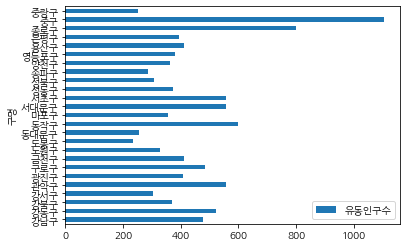

In [49]:
plt.rc('font', family='NanumGothic') 
구별통계.plot(kind='barh')
plt.show()

## (실습 #3) 서울시 각 구별로 출퇴근 시간의 유동인구 분석 
(출퇴근 시간은 7시-10시, 18시-21시로 가정함)


In [50]:
최종데이터['출퇴근'] = 최종데이터.시간대.map({
    '07시-08시': '출근',
    '08시-09시': '출근',
    '09시-10시': '출근',
    '10시-11시': '일반',
    '11시-12시': '일반',
    '12시-13시': '일반',
    '13시-14시': '일반',
    '14시-15시': '일반',
    '15시-16시': '일반',
    '16시-17시': '일반',
    '17시-18시': '일반',
    '18시-19시': '퇴근',
    '19시-20시': '퇴근',
    '20시-21시': '퇴근'
})

In [51]:
ex3 = 최종데이터.pivot_table(index='구명', columns='출퇴근', values='유동인구수', aggfunc='mean')

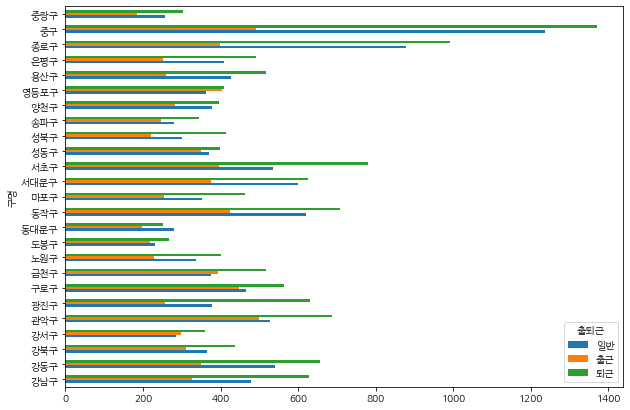

In [52]:
ex3.plot(kind='barh',figsize=(10,7))
plt.show()

In [53]:
ex3['출퇴근']= (ex3.출근+ex3.퇴근)/2

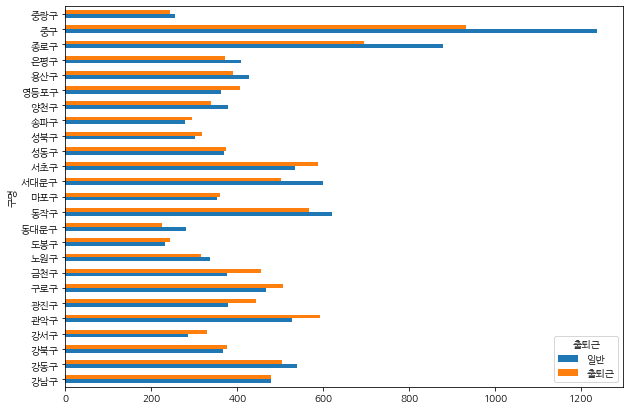

In [54]:
ex3[['일반','출퇴근']].plot(kind='barh',figsize=(10,7))
plt.show()

## (실습 #4) 평일 유동인구와 주말 유동인구를 분석하여, 그 차이가 가장 많이 나는 상위 5개 구 정보를 출력


In [55]:
최종데이터['주말여부'] = 최종데이터.조사요일.apply(lambda x: '주말' if x in['토', '일'] else '주중')

In [56]:
ex4 = 최종데이터.pivot_table(index='구명', columns='주말여부', values='유동인구수', aggfunc='mean')

In [57]:
ex4['주중주말차이'] = abs(ex4.주중 - ex4.주말)

In [58]:
ex4.sort_values(by ='주중주말차이',ascending=False).head(5)

주말여부,주말,주중,주중주말차이
구명,,,
중구,1233.339796,1073.908163,159.431633
금천구,348.531056,424.756211,76.225155
용산구,464.035714,397.695000,66.340714
서대문구,508.255102,569.382015,61.126913
강남구,438.160714,487.990848,49.830134


## (실습 #5) 유동인구의 수와 보행환경 정보를 분석 

(보행환경 정보는 속성조사_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5) )

보행 환경 개선이 시급한 곳 10군데를 선정.

In [60]:
속성조사 = pd.read_excel('data/서울시유동인구/2_유동인구_속성조사_2015.xlsx',
                     skiprows=[0, 1, 3])

In [61]:
속성조사.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID속성조사     20000 non-null  int64  
 1   조사지점코드     20000 non-null  object 
 2   조사일자       20000 non-null  int64  
 3   조사요일       20000 non-null  object 
 4   남여구분       20000 non-null  object 
 5   조사시간대      0 non-null      float64
 6   조사시간대_텍스트  20000 non-null  object 
 7   연령대        20000 non-null  object 
 8   거주지        19118 non-null  object 
 9   통행주목적      20000 non-null  object 
 10  방문횟수       20000 non-null  object 
 11  동행자명       0 non-null      float64
 12  교통수단       0 non-null      float64
 13  보행환경       20000 non-null  object 
 14  직업명        18574 non-null  object 
 15  년도         20000 non-null  int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 2.4+ MB


In [64]:
속성조사.조사지점코드.value_counts().value_counts()

20    1000
Name: 조사지점코드, dtype: int64

In [67]:
속성조사['보행점수'] = 속성조사.보행환경.map({
    '매우불만족': 1,
    '약간불만족': 2,
    '보통': 3,
    '약간만족': 4,
    '매우만족': 5
})

In [68]:
보행점수 = 속성조사.pivot_table(index='조사지점코드',
                        values='보행점수',aggfunc='mean')

In [70]:
지점별유동인구 = 최종데이터.pivot_table(index='조사지점코드',
                        values='유동인구수',aggfunc='mean')

In [72]:
지점별통계 = pd.concat([보행점수,지점별유동인구], axis=1, sort=True)

In [75]:
개선시급지역 = 지점별통계[지점별통계.보행점수<2].sort_values(by='유동인구수',ascending=False).head(10)

In [78]:
개선시급지역 = pd.concat([개선시급지역,
                    정제된조사지점.set_index('조사지점코드')[['조사지점명', 'X좌표', 'Y좌표']]],
                   axis=1, sort=True, join='inner')

In [83]:
개선시급지역['위경도'] = 개선시급지역.apply(lambda 지점:transformer.transform(지점.X좌표, 지점.Y좌표),axis=1)

In [84]:
for idx, row in 개선시급지역.iterrows():
    folium.Marker(row.위경도, popup=row.조사지점명).add_to(map1)
    
map1